In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts


In [4]:
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [7]:
##verifico a moda de Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

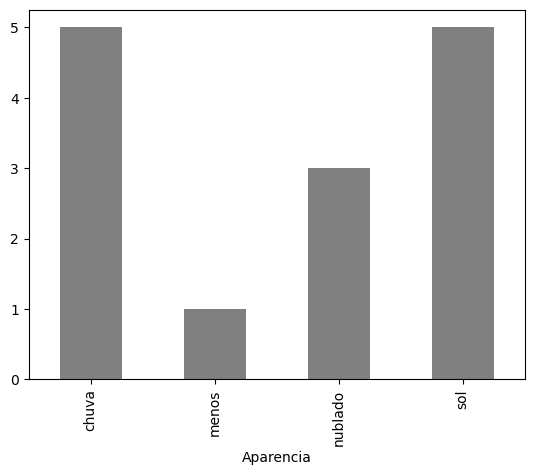

In [11]:
agrupado.plot.bar(color='gray')

In [14]:
dataset['Aparencia'].describe()

count      14
unique      4
top       sol
freq        5
Name: Aparencia, dtype: object

In [18]:
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [22]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [25]:
#verifico a moda de Umidade
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [27]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [29]:
#verifico a moda de vento
agrupado_vento = dataset.groupby(['Vento']).size()
agrupado_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [31]:
dataset['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

In [33]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [35]:
dataset['Jogar'].describe()

count      14
unique      2
top       sim
freq        9
Name: Jogar, dtype: object

In [58]:
#Verifico mediana de Umidade
mediana = sts.median(dataset['Umidade'])
mediana

85.25

In [86]:
#aqui faço a substituição de NAN pela mediana
dataset['Umidade'] = dataset['Umidade'].fillna(mediana)
#verifica se NAN ainda existe
dataset['Umidade'].isnull().sum()

0

In [54]:
#verifico novamente o dataset
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [88]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [97]:
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [99]:
#Agora faremos a adequação da temperatura comecamos verificando se há
dataset.loc[(dataset['Temperatura'] < -130) | ( dataset['Temperatura'] > 130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [103]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [109]:
# !!! Verificar se a coluna 'Temperatura' contém apenas números!!
#antes de fazer a substituiçao deve realizar isto
dataset['Temperatura'].dtype


dtype('float64')

In [111]:
dataset['Temperatura'].isnull().sum()

0

In [115]:
#substituir
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [117]:
#verificamos se ainda existem temperaturas fora do padrao
dataset.loc[(dataset['Temperatura'] < -130) | ( dataset['Temperatura'] > 130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [121]:
#Agora faremos a adequação da Umidade
#comecamos verificando se há
dataset.loc[(dataset['Umidade'] < 0) | ( dataset['Umidade'] > 100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [123]:
mediana = sts.median(dataset['Umidade'])
mediana

85.25

In [125]:
dataset['Umidade'].dtype


dtype('float64')

In [129]:
dataset.loc[(dataset['Umidade'] < -0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [131]:
#verificaçao se ainda existem Umidade fora do padrao
dataset.loc[(dataset['Temperatura'] < -130) | ( dataset['Temperatura'] > 130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [138]:
#insere os dados de menos em sol que fica na aparencia
#dataset.loc[dataset['Aparencia'] == 'menos', = Aqui é um método que realiza uma condição booleana, selecionando todas as linhas onde 'Aparencia' tem o valor 'menos'.
# , 'Aparencia'] = "sol" = Após a virgula significa que será mudado esta coluna "aparencia", onde o valor de 'Aparencia' é 'menos', ele será substituído por "sol"
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "sol"
#caso tivesse mais de uma mudanca, dataset.loc[dataset['Aparencia'].isin(['menos, mais]), 'Aparencia] = "sol"

In [140]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [154]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64